# Problem Set 8

## Problem 1

Plot the phase portrait and classify the fixed points for the following systems:

**(a)** $\dot{x} = -3x + 2y, \hspace{3mm} \dot{y} = x - 2y$;  

**(b)** $\dot{x} = 5x + 10y, \hspace{3mm} \dot{y} = -x - y$;  

**(c)** $\dot{x} = y, \hspace{3mm} \dot{y} = -x - 2y$.

### Solution

$$
\begin{bmatrix}
\frac{dx}{dt}\\
\frac{dy}{dt}
\end{bmatrix}

=

A
\begin{bmatrix}
x\\
y
\end{bmatrix}
$$

We'll skip the process of finding the eigenvalues and eigenvectors of the $2 \times 2$ matrix at this point, the e-vals are discussed at the end of the problem.

In [25]:
import numpy as np
import sympy as sp
import scipy as scp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
a, b, c, d = sp.symbols('a, b, c, d')
t = sp.symbols('t')
x = sp.Function('x')(t)
y = sp.Function('y')(t)


A = sp.Matrix([
    [a, b],
    [c, d]
])

u = sp.Matrix([x, y])

#### (a), (b), (c)

$$
A_a = 
\begin{bmatrix}
-3 & 2\\
1 & -2
\end{bmatrix},
\hspace{3mm}
A_b =
\begin{bmatrix}
5 & 10\\
-1 & -1
\end{bmatrix},
\hspace{3mm}
A_c = 
\begin{bmatrix}
0 & 1\\
-1 & -2
\end{bmatrix}.
$$

The solution to these ODE systems are:

In [4]:
subs1 = {a: -3, b: 2, c: 1, d: -2}
subs2 = {a: 5, b: 10, c: -1, d: -1}
subs3 = {a: 0, b: 1, c: -1, d: -2}

sol1 = sp.solvers.ode.systems.dsolve_system(u.diff(t) - A.subs(subs1)*u, funcs=[x, y], t=t)
sol2 = sp.solvers.ode.systems.dsolve_system(u.diff(t) - A.subs(subs2)*u, funcs=[x, y], t=t)
sol3 = sp.solvers.ode.systems.dsolve_system(u.diff(t) - A.subs(subs3)*u, funcs=[x, y], t=t)

u1 = sp.Matrix([i.rhs for i in sol1[0]])
u2 = sp.Matrix([i.rhs for i in sol2[0]])
u3 = sp.Matrix([i.rhs for i in sol3[0]])

* System **(a)**:

In [5]:
u1

Matrix([
[-2*C1*exp(-4*t) + C2*exp(-t)],
[   C1*exp(-4*t) + C2*exp(-t)]])

* System **(b)**:

In [6]:
u2

Matrix([
[(C1 + 3*C2)*exp(2*t)*sin(t) - (3*C1 - C2)*exp(2*t)*cos(t)],
[                  C1*exp(2*t)*cos(t) - C2*exp(2*t)*sin(t)]])

* System **(c)**:

In [7]:
u3

Matrix([
[C2*t*exp(-t) + (C1 + C2)*exp(-t)],
[      -C1*exp(-t) - C2*t*exp(-t)]])

Now let's plot the phase portraits:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
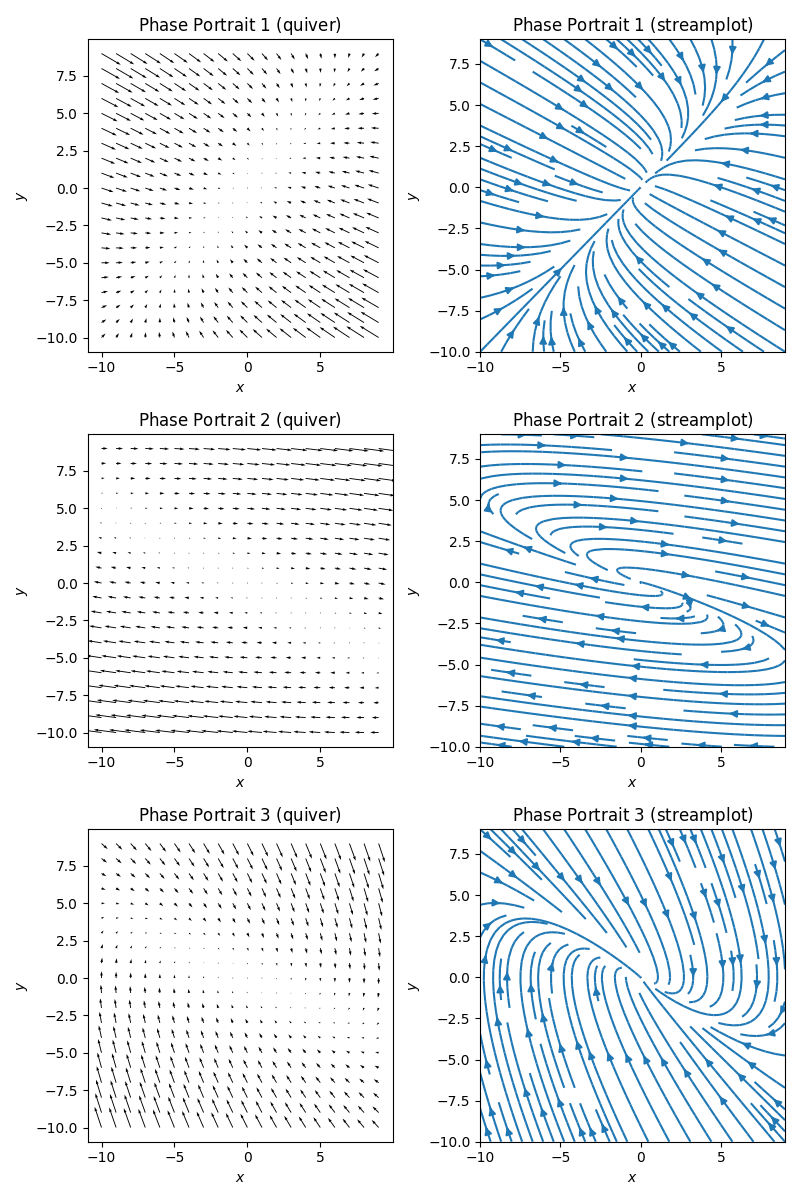

In [8]:
Aa = np.array([
    [-3, 2],
    [1, -2]
])

Ab = np.array([
    [5, 10],
    [-1, -1]
])

Ac = np.array([
    [0, 1],
    [-1, -2]
])

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

X, Y = np.meshgrid(x, y)

ni, nj = X.shape

U1 = np.zeros(X.shape)
V1 = np.zeros(Y.shape)
U2 = np.zeros(X.shape)
V2 = np.zeros(Y.shape)
U3 = np.zeros(X.shape)
V3 = np.zeros(Y.shape)

for i in range(ni):
    for j in range(nj):
        U1[i][j], V1[i][j] = Aa.dot(np.array([X[i][j], Y[i][j]]))
        U2[i][j], V2[i][j] = Ab.dot(np.array([X[i][j], Y[i][j]]))
        U3[i][j], V3[i][j] = Ac.dot(np.array([X[i][j], Y[i][j]]))

Us = [U1, U2, U3]
Vs = [V1, V2, V3]

fig, (ax1, ax2, ax3) = plt.subplots(3, 2)
axes = (ax1, ax2, ax3)
for i, ax in enumerate(axes):
    ax[0].quiver(X, Y, Us[i], Vs[i])
    ax[1].streamplot(X, Y, Us[i], Vs[i])
    for a in ax:
        a.set_xlabel('$x$')
        a.set_ylabel('$y$')
    ax[0].set_title('Phase Portrait ${}$ (quiver)'.format(i+1))
    ax[1].set_title('Phase Portrait ${}$ (streamplot)'.format(i+1))

fig.set_size_inches(8, 12)
plt.tight_layout()

Now let's analyze the fixed points for each system of ODEs:

* **(a)** - This is a stable node, as the solution tends to $0$ as $t \rightarrow 0$. $x$ decreases as fast as $y$. This is also seen as $\lambda_{1, 2} < 0 \in \mathbb{R}$.

* **(b)** - Spiral. The eigenvalues are complex conjugate (as we have both trigonometric and exponential functions in the solution, also checked via direct e-val computation). $y$ and $x$ are a combionation of oscillations with increasing amplitude over time.

* **(c)** - Degenerate node. The eigenvalues $\lambda_1 = \lambda_2 = 1$ are real and equal.
  

## Problem 2

Suppose the relationship between Romeo and Juliet is such that

$$
\dot{R} = aR + bJ, \hspace{3mm} \dot{J} = -bR - aJ
$$

with positive $a$ and $b$. Describe the type of the relationship and explain its fate depending on the initial conditions.

### Solution

Let's write down the matrix equation:

$$
\frac{d}{dt}
\begin{bmatrix}
R\\
J.
\end{bmatrix}
=
\begin{bmatrix}
a & b\\
-b & -a
\end{bmatrix}
\begin{bmatrix}
R\\
J
\end{bmatrix}
$$

While Romeo is sure about his feelings ($aR$) and responds to Juliet's attitude ($bJ$), Juliet is being a real woman - she hates him when he loves her and vice versa ($-bR$), also not knowing what to do with herself ($-aJ$). Once a wise man said, "Чем меньше женщину мы любим, тем больше меньше мы, чем тем".


The eigenvalues can be represented with trace $\tau$

$$
\tau = a - a = 0
$$

and determinant $\Delta$

$$
\Delta = -a^2 + b^2
$$

as follows:

$$
\lambda_{1, 2} = \frac{1}{2}(\tau \pm \sqrt{\tau ^2 - 4\Delta}) = \frac{\pm 1}{2}\sqrt{-4(b^2 - a^2)} = \pm\sqrt{a^2 - b^2}
$$

with $a > 0$, $b > 0$.

The (non-normalized) eigenvectors are:

$$
s_{1, 2} = 
\begin{bmatrix}
- \frac{a}{b} \pm  \frac{\sqrt{(a-b)(a+b)}}{b}\\
1
\end{bmatrix}
$$


Now, $3$ different scenarios are possible:

* $a > b$, then $\lambda_1 = -\lambda_2$ and $\lambda_{1, 2} \in \mathbb{R}$. This will match the saddle case. Depending on the intial conditions $J_0$ and $R_0$, their relation will "follow" one of the main directions (eigenvectors). The eigenvectors will point to $2^{nd}$ and $4^{th}$ quadrants with corresponding eigenvalues being positive and negative, respectively. Thus, the love point will tend to $2^{nd}$ or $4^{th}$ quadrant, meaning that eventually either Juliet hates Romeo, but he keeps loving her more and more (poor guy =( ), or vice versa (poor girl =( ).

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
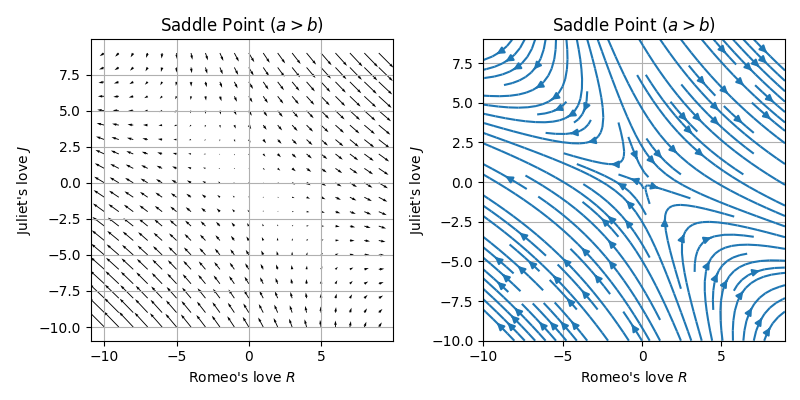

In [9]:
RJ = np.array([
    [5, 3],
    [-3, -5]
])

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

X, Y = np.meshgrid(x, y)

ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(Y.shape)

for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = RJ.dot(np.array([X[i][j], Y[i][j]]))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.quiver(X, Y, U, V)
ax2.streamplot(X, Y, U, V)
ax1.grid()
ax1.set_title('Saddle Point ($a > b$)')
ax1.set_xlabel('Romeo\'s love $R$')
ax1.set_ylabel('Juliet\'s love $J$')
ax2.grid()
ax2.set_title('Saddle Point ($a > b$)')
ax2.set_xlabel('Romeo\'s love $R$')
ax2.set_ylabel('Juliet\'s love $J$')
fig.set_size_inches(8, 4)
plt.tight_layout()

* $a = b$, thus, $\lambda_1 = \lambda_2 = 0$. This is a singular matrix ($rg(A) = 0$). This case is a degenerate node. There is one eigenvector: $(1,1)^T$, which is the nullspace of the matrix. Romeo values his feeling as much as Juliet's: $aR + aJ$. Juliet hesitates both in her state and in Romeo's suspicious attention to her equally: $-aR - aJ$. Thus, when $R = -J$, their relationship will forever remain the same: one loves and another hates. Other than that case, whether $R > J$, Romeo will keep fallin in love while Juliet keep hating him more. Opposite in the other case.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
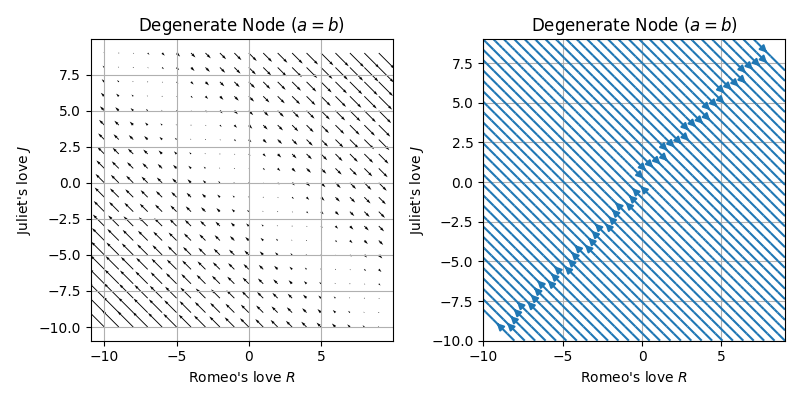

In [10]:
RJ = np.array([
    [1, 1],
    [-1, -1]
])

for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = RJ.dot(np.array([X[i][j], Y[i][j]]))


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.quiver(X, Y, U, V)
ax2.streamplot(X, Y, U, V)
ax1.grid()
ax1.set_title('Degenerate Node ($a = b$)')
ax1.set_xlabel('Romeo\'s love $R$')
ax1.set_ylabel('Juliet\'s love $J$')
ax2.grid()
ax2.set_title('Degenerate Node ($a = b$)')
ax2.set_xlabel('Romeo\'s love $R$')
ax2.set_ylabel('Juliet\'s love $J$')
fig.set_size_inches(8, 4)
plt.tight_layout()

* $a < b$ — $\lambda_1 = \lambda_2^*$, both are purely imaginary. This represents a center. With imaginary eigenvalues the matrix $A$ represents pure rotation, thus, every change vector is perpendicular to the current love vector. The relationship will go roundabout an elliptic trajectory with certain radiuses, dependent on initial conditions.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
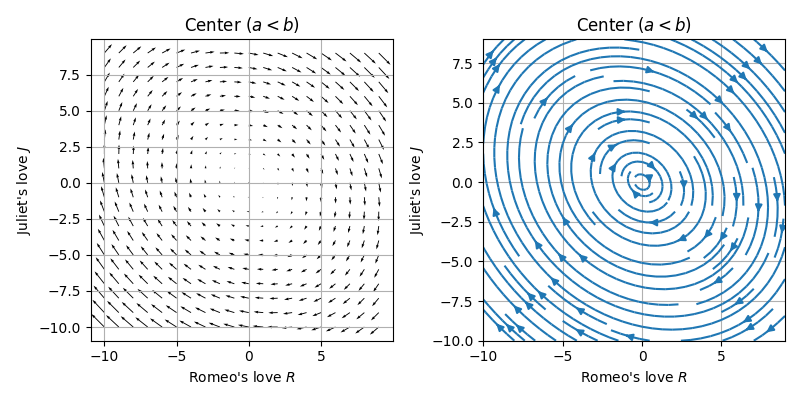

In [11]:
RJ = np.array([
    [1, 5],
    [-5, -1]
])

for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = RJ.dot(np.array([X[i][j], Y[i][j]]))


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.quiver(X, Y, U, V)
ax2.streamplot(X, Y, U, V)
ax1.grid()
ax1.set_title('Center ($a < b$)')
ax1.set_xlabel('Romeo\'s love $R$')
ax1.set_ylabel('Juliet\'s love $J$')
ax2.grid()
ax2.set_title('Center ($a < b$)')
ax2.set_xlabel('Romeo\'s love $R$')
ax2.set_ylabel('Juliet\'s love $J$')
fig.set_size_inches(8, 4)
plt.tight_layout()

```{note}
Poor guys =(
```

## Problem 3

For the system

$$
\dot{x} = xy - 1, \hspace{3mm} \dot{y} = x - y^3
$$

find the fixed points, classify them, sketch the neighbouring trajectories and try to fill in the rest of the phase plane.

### Solution

Starting with the fixed points:

$$
xy = 1\\
x = y^3
$$

We get 4 different fixed points:

$$
y = [1, -1, i, -i]\\
x = [1, -1, -i, i]\\

p_1 = (1, 1),\hspace{3mm} p_2 = (-1, -1),\hspace{3mm} p_3 = (i, -i),\hspace{3mm}p_4 = (-i, i).
$$

Assuming that $x$ and $y$ are real, we are left with the following two:

$$
p_1 = (1, 1)\\
p_2 = (-1, -1).
$$

To classify them, let's linearize the equations:

$$
\frac{dx}{dt} = f(x, y, t),\\
f(x, y, t) = f(x_0, y_0, t) + f'_x(x_0, y_0, t)(\Delta x) + f'_y(x_0, y_0, t)(\Delta y) + ...\\
\hspace{3mm}\\
\frac{dy}{dt} = g(x, y, t),\\
g(x, y, t) = f(x_0, y_0, t) + g'_x(x_0, y_0, t)(\Delta x) + g'_y(x_0, y_0, t)(\Delta y) + ...
$$

This gives us

$$
\begin{align*}
&\dot{x} = x_0 \Delta x + y_0 \Delta y\\
&\dot{y} = \Delta x + -3y_0^2 \Delta y
\end{align*}
$$

or

$$
\frac{d}{dt}
\begin{bmatrix}
x\\
y
\end{bmatrix}
=
\begin{bmatrix}
x_0 & y_0\\
1 & -3y_0^2
\end{bmatrix}
\begin{bmatrix}
\Delta x\\
\Delta y
\end{bmatrix}.
$$

```{note}
Here and afterwards $x, y$ in the right hand side of the linearized equation are actually $x'$ and $y'$ that can be obtained as $x' = x_0 + \Delta x$, $y' = y_0 + \Delta y$.
```

* Starting with the first point, $(1, 1)$:

$$
A =
\begin{bmatrix}
1 & 1\\
1 & -3
\end{bmatrix}
$$

In [12]:
A = sp.Matrix([
    [1, 1],
    [1, -3]
])

A.eigenvects()

[(-1 + sqrt(5),
  1,
  [Matrix([
   [2 + sqrt(5)],
   [          1]])]),
 (-sqrt(5) - 1,
  1,
  [Matrix([
   [2 - sqrt(5)],
   [          1]])])]

The eigenvalues are

$$
\lambda_{1, 2} = -1 \pm \sqrt{5}
$$

and the eigenvectors:

$$
s_{1, 2} =
\begin{bmatrix}
2 \pm \sqrt{5}\\
1
\end{bmatrix}
$$

This gives us the saddle fixed point.

* For the second point $(-1, -1)$:

$$
A =
\begin{bmatrix}
-1 & -1\\
1 & 3
\end{bmatrix}
$$

In [13]:
A = sp.Matrix([
    [-1, -1],
    [1, -3]
])

A.eigenvects()

[(-2,
  2,
  [Matrix([
   [1],
   [1]])])]

We have the eigenvalue $\lambda = 2$ with multiplicity $2$ and the eigenvector $s = \begin{bmatrix}1\\1\end{bmatrix}$, which yields the degenerate node.

Now let's sketch the phase portrait. By the powers of **python** we can avoid sketching only the neighbourhoods and sketch the whole portrait:

In [14]:
def dx(x, y, t):
    return x*y - 1

def dy(x, y, t):
    return x - y**3

A1 = np.array([
    [1, 1],
    [1, -3]
])
A2 = np.array([
    [-1, -1],
    [1, -3]
])

#quiver plot
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape
U = np.zeros(X.shape)
V = np.zeros(X.shape)
for i in range(ni):
    for j in range(nj):
        U[i][j] = dx(X[i][j], Y[i][j], 0)
        V[i][j] = dy(X[i][j], Y[i][j], 0)
plt.subplot(3, 1, 1)
plt.quiver(X, Y, U, V)
plt.title('Phase Portrait, quiver')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

#streamplot
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape
U = np.zeros(X.shape)
V = np.zeros(X.shape)
for i in range(ni):
    for j in range(nj):
        U[i][j] = dx(X[i][j], Y[i][j], 0)
        V[i][j] = dy(X[i][j], Y[i][j], 0)
plt.subplot(3, 1, 2)
plt.streamplot(X, Y, U, V, density=2)
plt.title('Phase Portrait, streamplot')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

#point (1, 1)
x = np.arange(-1, 1, 0.05)
y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape
U = np.zeros(X.shape)
V = np.zeros(X.shape)
for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = A1.dot(np.array([X[i][j], Y[i][j]]))
plt.subplot(3, 2, 5)
plt.streamplot(X, Y, U, V)
plt.title('$p_0 = (1, 1)$, streamplot')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.grid()

#point (-1, -1)
x = np.arange(-1, 1, 0.05)
y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape
U = np.zeros(X.shape)
V = np.zeros(X.shape)
for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = A2.dot(np.array([X[i][j], Y[i][j]]))
plt.subplot(3, 2, 6)
plt.streamplot(X, Y, U, V)
plt.title('$p_1 = (-1, -1)$, streamplot')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.grid()

fig = plt.gcf()
fig.set_size_inches(8, 12)
plt.tight_layout()

## Problem 4

For the following model of rabbits and sheep, find the fixed points, investigate their stability and draw the phase portrait. Indicate the basins of attraction of any stable fixed point:

$$
\dot{x} = x(3 - 2x - 2y), \hspace{3mm} \dot{y} = y(2 - x - y).
$$

### Solution

As always, we start with finding the fixed points:

In [29]:
x, y = sp.symbols('x, y')

eq1 = x*(3 - 2*x - 2*y)
eq2 = y*(2 - x - y)

eqs = [eq1, eq2]

sol = sp.solve(eqs, x, y)
sol

[(0, 0), (0, 2), (3/2, 0)]

Fixed points are:

$$
p_1 = (0, 0)\\
p_2 = (0, 2)\\
p_3 = (\frac{4}{3}, \frac{2}{3})
$$

Now let's linearize the equations around the fixed points:

$$
\begin{bmatrix}
\dot{x}\\
\dot{y}
\end{bmatrix}
=
\begin{bmatrix}
3 - 4x_0 & -2x_0\\
-y_0 & 2 - 2y_0
\end{bmatrix}
\begin{bmatrix}
\Delta x\\
\Delta y
\end{bmatrix}
$$

And find the types of the points:

In [30]:
x0, y0 = sp.symbols('x0, y0')
A = sp.Matrix([
    [3 - 4*x0, -2*x0],
    [-y0, 2 - 2*y0]
])

subs1 = {x0: 0, y0: 0}
subs2 = {x0: 0, y0: 2}
subs3 = {x0: sp.Rational(3, 2), y0: 0}

In [31]:
A.subs(subs1).eigenvects()

[(2,
  1,
  [Matrix([
   [0],
   [1]])]),
 (3,
  1,
  [Matrix([
   [1],
   [0]])])]

In [32]:
A.subs(subs2).eigenvects()

[(-2,
  1,
  [Matrix([
   [0],
   [1]])]),
 (3,
  1,
  [Matrix([
   [-5/2],
   [   1]])])]

In [33]:
A.subs(subs3).eigenvects()

[(-3,
  1,
  [Matrix([
   [1],
   [0]])]),
 (2,
  1,
  [Matrix([
   [-3/5],
   [   1]])])]

* p_1 = (0, 0): unstable node

$$
\lambda_1 = 2,\hspace{3mm}\lambda_2 = 3,\\
\hspace{3mm}\\
s_1 = \begin{bmatrix}1 \\ 0\end{bmatrix}, \hspace{3mm} s_2=\begin{bmatrix}0 \\ 1\end{bmatrix}
$$

* p_2 = (0, 2): saddle

$$
\lambda_1 = -2,\hspace{3mm}\lambda_2 = 3,\\
\hspace{3mm}\\
s_1 = \begin{bmatrix}0 \\ 1\end{bmatrix}, \hspace{3mm} s_2=\begin{bmatrix}-\frac{5}{2} \\ 1\end{bmatrix}
$$

* p_3 = ($\frac{4}{3}, \frac{2}{3}$): saddle

$$
\lambda_{1,2} = -\frac{3}{2} \pm \frac{ \sqrt{17}}{2},\\
\hspace{3mm}\\
s_{1,2} = \begin{bmatrix}\frac{5}{8} \mp \frac{ 3\sqrt{17}}{8} \\ 1\end{bmatrix}
$$



Now let's draw the phase portrait:

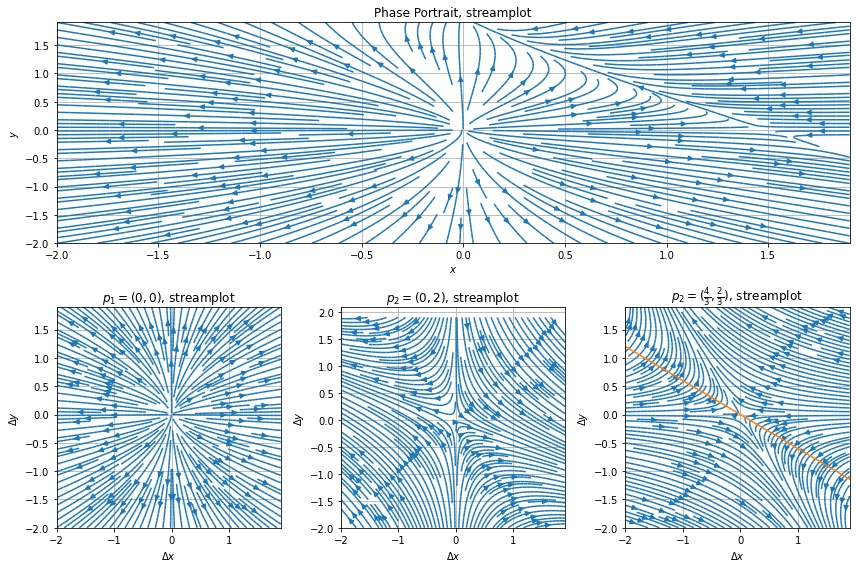

In [36]:
%config InlineBackend.figure_format = 'jpg'

def dx(x, y):
    return x*(3 - 2*x - 2*y)

def dy(x, y):
    return y*(2 - x - y)

A1 = np.array(A.subs(subs1), dtype=np.float64)
A2 = np.array(A.subs(subs2), dtype=np.float64)
A3 = np.array(A.subs(subs3), dtype=np.float64)

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape
U = np.zeros(X.shape)
V = np.zeros(X.shape)
for i in range(ni):
    for j in range(nj):
        U[i][j] = dx(X[i][j], Y[i][j])
        V[i][j] = dy(X[i][j], Y[i][j])
plt.subplot(2, 1, 1)
plt.streamplot(X, Y, U, V, density=2)
plt.title('Phase Portrait, streamplot')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape
U = np.zeros(X.shape)
V = np.zeros(X.shape)

for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = A1.dot(np.array([X[i][j], Y[i][j]]))
plt.subplot(2, 3, 4)
plt.streamplot(X, Y, U, V, density=2)
plt.title('$p_1 = (0, 0)$, streamplot')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.grid()

for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = A2.dot(np.array([X[i][j], Y[i][j]]))
plt.subplot(2, 3, 5)
plt.streamplot(X, Y, U, V, density=2)
plt.title('$p_2 = (0, 2)$, streamplot')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.grid()

for i in range(ni):
    for j in range(nj):
        U[i][j], V[i][j] = A3.dot(np.array([X[i][j], Y[i][j]]))
plt.subplot(2, 3, 6)
plt.streamplot(X, Y, U, V, density=2)
plt.plot(x, -3/5*x)
plt.title('$p_2 = (\\frac{{{4}}}{{{3}}}, \\frac{{{2}}}{{{3}}})$, streamplot')
plt.xlabel('$\Delta x$')
plt.ylabel('$\Delta y$')
plt.grid()
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.tight_layout()

As for the basins of attraction: neither of these points is a stable fixed point. However, we can predict the behaviour of the solutions at the large $t$.

For $p_1$, there is no basin of the attraction, as the node is unstable - every solution diverges from the point.

For $p_2$, we have two eigenvectors and eigenvalues with different signs, the first being negative and the second positive. This means that solutions will tend towards the second eigenvector $s_2 = \begin{bmatrix} -\frac{5}{2} \\ 1\end{bmatrix}$. If started from the left hand side of the first eigenvector $s_1 = \begin{bmatrix}0 \\ 1\end{bmatrix}$, i.e. $x_0 < 0$, the solution tends towards against $s_2$. If started from the right hand side, $x_0 > 0$, it tends towards the direction of $s_2$.

For $p_3$ the same logic is applied with its eigenvectors. $x_0, y_0$ above the line $s_2 = \begin{bmatrix}\frac{5}{8} + \frac{ 3\sqrt{17}}{8} \\ 1\end{bmatrix}$ crossing the point $(\frac{4}{3}, \frac{2}{3})$ - if

## Problem 5
Consider the system

$$
\dot{x} = -y - x^3, \hspace{3mm} \dot{y} = x.
$$

Show that the origin is a spiral, although the linearization predicts a center.

### Solution

Fixed points:

$$
-y -x^3 = 0, \hspace{3mm}x = 0\\
\Rightarrow x = 0, \hspace{3mm} y = 0.
$$

Linearization:

$$
\frac{d}{dt}
\begin{bmatrix}
x\\
y\\
\end{bmatrix}
=
\begin{bmatrix}
-3x_0^2 & -1\\
1 & 0
\end{bmatrix}
\begin{bmatrix}
\Delta x\\
\Delta y
\end{bmatrix}
$$

Let's find eigenvalues of the matrix $A|_{(0, 0)}$:


In [21]:
A = np.array([
    [0, -1],
    [1, 0]
])

sp.Matrix(A).eigenvects()

[(-I,
  1,
  [Matrix([
   [-I],
   [ 1]])]),
 (I,
  1,
  [Matrix([
   [I],
   [1]])])]

Pure imaginary $\lambda$'s indeed tell us this should be a center (pure rotation of the vectors). However, let's plot the phase portrait aroun $(0, 0)$:

In [22]:
def dx(x, y):
    return -y - x**3

def dy(x, y):
    return x

x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)
ni, nj = X.shape

U = np.zeros(X.shape)
V = np.zeros(X.shape)

for i in range(ni):
    for j in range(nj):
        U[i][j] = dx(X[i][j], Y[i][j])
        V[i][j] = dy(X[i][j], Y[i][j])

plt.subplot(211)
plt.quiver(X, Y, U, V)
plt.subplot(212)
plt.streamplot(X, Y, U, V)
plt.grid()
plt.gcf().set_size_inches(10, 10)

To explain this behaviour, let's move to polar coordinates:

$$
r^2 = x^2 + y^2,\\
x = r\cos{\varphi}, \hspace{3mm} y = r\sin{\varphi}.
$$

Then

$$
\dot{r}\cos{\varphi} - r\dot{\varphi}\sin{\varphi} = -r\sin{\varphi} - r^3\cos^3{\varphi},\\
\dot{r}\sin{\varphi} + r\dot{\varphi}\cos{\varphi} = r\cos{\varphi}
$$

and

$$
r\dot{\varphi} = r + r^3\cos^3{\varphi}\sin{\varphi}
$$

Assuming we start not from the fixed point (i.e. $r \neq 0$), we get

$$
\dot{\varphi} = 1 + r^2\cos^3{\varphi}\sin{\varphi}.
$$

Substitute this to the first equation:

$$
\dot{r}\sin{\varphi}\cos{\varphi} - r\dot{\varphi}\sin^2{\varphi} = -r\sin^2{\varphi} - r^3\cos^3{\varphi}\sin{\varphi},\\
\hspace{3mm}\\
\dot{r} = -r^3\cos^4{\varphi}.
$$

From here we see, recalling our assumption $r \neq 0$, that at $\forall \varphi \neq \pm \frac{\pi}{2}$ the $\dot{r}$ term is not zero, thus, the radius will change, meaning the fixed point is not center anymore (center means rotational movement). At $\varphi = \pm \frac{\pi}{2}$ $\dot{r} = 0$, which is seen on the phase portrait as the motion perpendicular to $OY$.

## Problem 6

The Kermack-McKendrick model of an epidemic describes the population of helathy people $x(t)$ and sick people $y(t)$ in terms of the equations

$$
\dot{x} = -kxy, \hspace{3mm} \dot{y} = kxy - ly,
$$

where $k, l > 0$. Here, $l$ is the death rate of the sick people in equation for $\dot{y}$ implies that people get sick at a rate proportional to their encounters (which itself is proportional to the product of the number of sick people $y$ and healthy people $x$). The parameter $k$ measures the probability of transmission of the disease during encounters.

**(a)** Find and classify the fixed points.  

**(b)** Sketch the nullclines and the vector field.  

**(c)** Find a conserved quantity for the system (hintL form an ODE for $dy/dx$ and integrate it).  

**(d)** Plot the phase portrait. What happens as $t \rightarrow \infty$?  

**(e)** Let $(x_0, y_0)$ be the initial condition. Under what conditions on $(x_0, y_0)$ will the epidemic occur? (Epidemic occurs if $y(t)$ increases initially).

### Solution

#### (a)

The fixed points are:

$$
\begin{cases}
-kxy = 0,\\
y(kx-l)=0
\end{cases}
$$

In this case there is only one possibility: $y = 0,\hspace{1mm}\Rightarrow \hspace{1mm} x \in \mathbb{R}$ - this is a line of fixed points in $X$ direction.

Linearization gives us the following equation:

$$
\frac{d}{dt}
\begin{bmatrix}
x\\
y
\end{bmatrix}
=
\begin{bmatrix}
0 & -kx\\
0 & kx-l
\end{bmatrix}
\begin{bmatrix}
\Delta x\\
\Delta y
\end{bmatrix}
$$

The matrix $A$ yields two eigenvalues:

$$
\lambda_1 = 0, \hspace{3mm} \lambda_2 = kx-l
$$

and corresponding eigenvectors:

$$
s_1 = \begin{bmatrix}1\\0\end{bmatrix}, \hspace{3mm}
s_2 =
\begin{bmatrix}
\frac{l}{kx} - 1\\
1
\end{bmatrix}
$$

Let's elaborate on possible $\lambda$'s:

1. $x < \frac{l}{k}$ - then $\lambda_2$ is negative and eigenvector $s_2$ points in the $1^{st}$ quadrant, we obtain 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
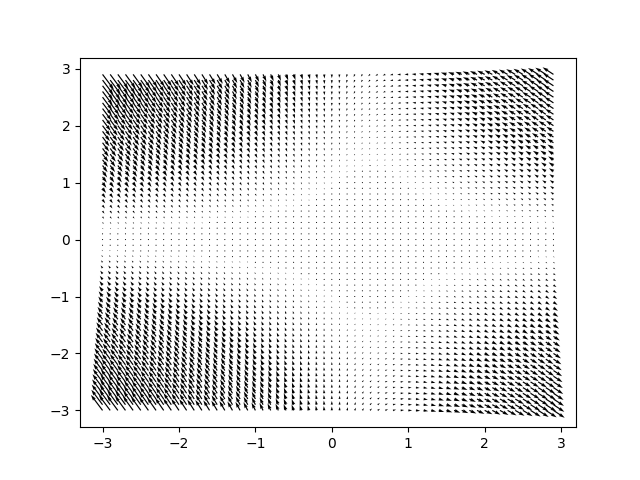

In [23]:
%matplotlib widget

A = np.array([
    [0, 0],
    [0, 0]
])

k = 0.1
l = 0.1

x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)

X, Y = np.meshgrid(x, y)
ni, nj = X.shape
U = np.zeros(X.shape)
V = np.zeros(X.shape)
for i in range(ni):
    for j in range(nj):
        A = np.array([
            [0, -k*X[i][j]],
            [0, k*X[i][j] - l]
        ])
        '''A[0, 1] = -k*X[i][j]
        A[1, 1] = k*X[i][j] - l'''
        U[i][j], V[i][j] = A.dot(np.array([X[i][j], Y[i][j]]))

plt.quiver(X, Y, U, V)

In [24]:
A[0, 1] = 1
A

array([[0.  , 1.  ],
       [0.  , 0.19]])